# Koneoppiminen: Osa 7: Perseptroni

In [ ]:
# Kirjoita tähän tietosi!
student_name = 'Tiina Jokela'

## Tehtävä 1
### Aihe: Onnellisuus

2 pistettä

Tutustu aineistoon Somerville Happiness Survey Data Set osoitteessa https://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey . 

Esikäsittele aineisto. Muista asettaa sarakkeiden nimet. Vinkki: UTF-16-enkoodattuja tiedostoja varten Pandasin CSV-funktiosta löytyy parametri encoding='utf-16'.

In [195]:
# Kirjoita toteutuksesi tähän soluun. 
import pandas as pd

column_names = ['Decision attribute', 'Availability of information', 'Cost of housing', 'Overall quality of public schools', 
                'Trust in the local police', 'Maintenance of streets and sidewalks', 'Availability of social community events']
df = pd.read_csv('SomervilleHappinessSurvey2015.csv', encoding='utf-16') 
df.columns = column_names

In [196]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Tallenna DataFrame df-muuttujaan ja koulutusaineisto.
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

Columns: Index(['Decision attribute', 'Availability of information', 'Cost of housing',
       'Overall quality of public schools', 'Trust in the local police',
       'Maintenance of streets and sidewalks',
       'Availability of social community events'],
      dtype='object')
First row by position: Decision attribute                         0
Availability of information                3
Cost of housing                            3
Overall quality of public schools          3
Trust in the local police                  4
Maintenance of streets and sidewalks       2
Availability of social community events    4
Name: 0, dtype: int64


## Tehtävä 2
### Aihe: Koulutusaineisto

2 pistettä

Jaa aineisto koulutus- (67%) ja testausaineistoon (33%) (`X_train`, `y_train`, `X_test`, `y_test`). Käytä satunnaissiementä `9001`.

In [197]:
# Kirjoita toteutuksesi tähän soluun. 
from sklearn.model_selection import train_test_split

X = df.drop(['Decision attribute'], axis=1)
y = df['Decision attribute']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=9001)

In [198]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Tallenna DataFrame df-muuttujaan ja koulutusaineisto.
print(f'Test length: {len(X_test)}')
print(f'Train length: {len(X_train)}')

Test length: 48
Train length: 95


## Tehtävä 3
### Aihe: Perseptroni

2 pistettä

1. Käytä `scikit-learn`-kirjaston lineaarista perseptronia luodaksesi luokittelija. Käytä satunnaissiementä `9001`. Tallenna luokittelija `pc`-muuttujaan.

2. Ennusta testausaineistosi todennäköisyys olla luokassa käyttäen luokittelijaasi ja tallenna luottamuspisteet muuttujaan `y_score`. Tallenna ennustettujen luokkien tulos muuttujaan `y_pred`.

Vinkki: luottamuspisteet saa lineaarisesta perseptronista `decision_function()`-funktiolla.

In [199]:
# Kirjoita toteutuksesi tähän soluun. 
from sklearn.linear_model import Perceptron

pc = Perceptron(random_state=9001)
pc.fit(X_train, y_train)
y_score = pc.decision_function(X_test)
y_pred = pc.predict(X_test)

In [200]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
print(f'Average test accuracy: {pc.score(X_test, y_test)}')

Average test accuracy: 0.4583333333333333


## Tehtävä 4
### Aihe: Kynnysarvon optimointikäyrä

4 pistettä

1. Tallenna luokitteluraportti `cr` ja sekaannusmatriisi `cm` käyttäen `metrics`-moduulia.

2. Laske regressiolle ROC-arvot `scikit-learn`-kirjaston `metrics`-moduulin avulla. Laske myös ROC-käyrän alainen alue muuttujaa `auc`.

3. Piirrä kynnysarvon optimointikäyrä `matplotlib`-kirjastolla. 

4. Kirjoita `pohdinta`-merkkijonomuuttujaan mitä ajatuksia ROC-käyrä ja tarkkuus herättävät. 

In [205]:
# Kirjoita toteutuksesi tähän soluun.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt

cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
auc = roc_auc_score(y_test, y_score)

fig = plt.figure()
lw = 2
plt.plot(fpr, tpr, color='lightseagreen', lw=lw, label='ROC curve') 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.close()

# Pohdintaa.
pohdinta="Tulos näyttää ROC-käyrän mukaan huonolta, ja niin tekee myös tarkkuuden mukaan, joka on 0,46."

Classification report:
               precision    recall  f1-score   support

           0       0.48      0.83      0.61        24
           1       0.33      0.08      0.13        24

    accuracy                           0.46        48
   macro avg       0.40      0.46      0.37        48
weighted avg       0.40      0.46      0.37        48

Confusion matrix:
 [[20  4]
 [22  2]]
auc: 0.5130208333333334
Pohdinta: Tulos näyttää ROC-käyrän mukaan huonolta, ja niin tekee myös tarkkuuden mukaan, joka on 0,46.


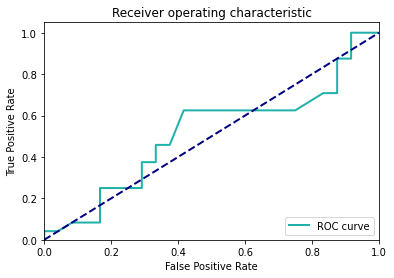

In [204]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Tee vastauksesi siten, että tämän solun tuloksena näkyy alla kaaviokuva.
print(f'Classification report:\n {cr}')
print(f'Confusion matrix:\n {cm}')
print(f'auc: {auc}')
print(f'Pohdinta: {pohdinta}')
fig